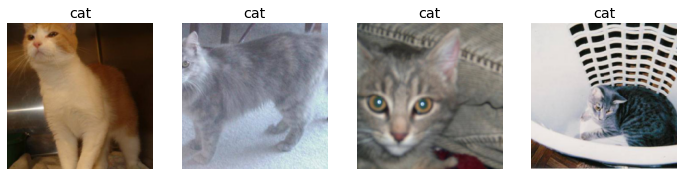

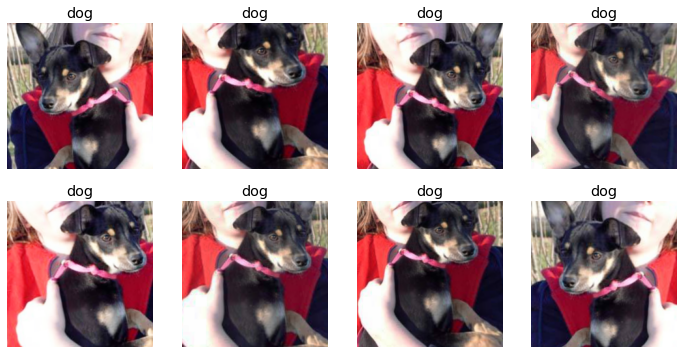

In [1]:
import os
from fastbook import *
from fastai import *
from fastai import *
from fastai.vision import *
from fastai.data.all import *
from fastai.vision.all import *
path = "/home/lucien/Desktop/Repos/cat_vs_dog/images"
#Change API key here by BING SEARCH api key 
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX') #replace with a working azure api bing search key


#Downloading images of cats, dogs, rabbits, uncomment if you need to download them.
'''
names = "cat", "dog"

for name in names: 
    subpath = path + "/" + name
    if not os.path.exists(subpath):
        os.makedirs(subpath)
    results = search_images_bing(key, name)
    urls = results.attrgot('contentUrl')
    download_images(subpath, urls=urls)

'''
from pathlib import Path

path = Path ('/home/lucien/Desktop/Repos/cat_vs_dog/images')

pictures = get_image_files(path)
failed = verify_images(pictures)
failed.map(Path.unlink);

#Building datablock 
animals = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale = 0.75)
    )


dls = animals.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

dls.train.show_batch(max_n=8, nrows=2, unique=True)




SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0004786300996784121)

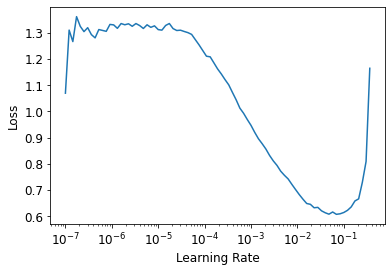

In [2]:
#Training resnet 18
from fastai.callback.fp16 import *

learn = cnn_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.lr_find()

In [3]:
learn.fine_tune(2, freeze_epochs = 2)

epoch,train_loss,valid_loss,accuracy,time
0,0.114751,0.117361,0.956400,03:15
1,0.062594,0.096511,0.962600,03:25


epoch,train_loss,valid_loss,accuracy,time
0,0.052235,0.100016,0.961800,04:17
1,0.027276,0.091097,0.967600,04:13


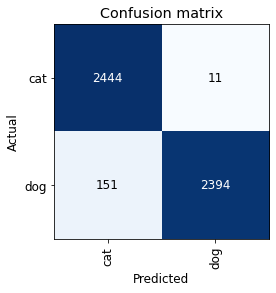

In [4]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


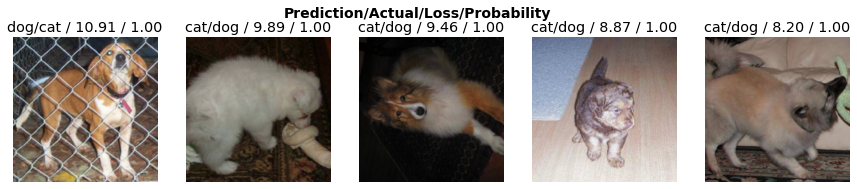

In [5]:

interp.plot_top_losses(5, nrows=1)


In [7]:
#
learn.export() #exporting model as pkl 


In [8]:
#Checking file exists 
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['cat', 'dog']

In [16]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [23]:
#hide
# For the book, we can't actually click an upload button, so we fake it
pathInit = Path()
btn_upload = SimpleNamespace(data = [pathInit/'images/cat/cat.1.jpg'])


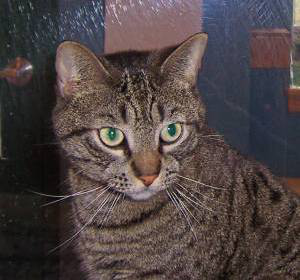

In [24]:
img = PILImage.create(btn_upload.data[-1])
img

In [25]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [26]:
pred,pred_idx,probs = learn_inf.predict(img)

In [27]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cat; Probability: 1.0000')

In [28]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [29]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [30]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [31]:
#hide_output
from ipywidgets import VBox
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 